In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

In [6]:
X_train, y_train = load_data("data/ex2data1.txt")

In [7]:
print(X_train[:5])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]


In [8]:
print(y_train[:5])

[0. 0. 0. 1. 1.]


In [9]:
print(X_train.shape, y_train.shape)

(100, 2) (100,)


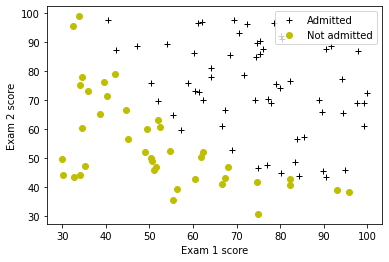

In [10]:
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

In [11]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [12]:
print("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


In [13]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


In [50]:
def compute_f(X, w, b):
    m, n = X.shape
    z = X @ w.reshape(n, 1) + b
    f = sigmoid(z)
    return f

In [51]:
def compute_cost(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    f = compute_f(X, w, b)
    y_mat = y.reshape(m, 1)
    loss = -y_mat * np.log(f) - (1 - y_mat) * np.log(1 - f)
    return np.sum(loss)/m

In [52]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [53]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)


Cost at test w,b: 0.218
All tests passed!


In [54]:
def compute_gradient(X, y, w, b, lambda_ = None):
    m, n = X.shape
    f = compute_f(X, w, b)
    dj_db = np.sum(f - y.reshape(m, 1)) / m
    tmp = X * (f - y.reshape(m, 1))
    dj_dw = np.sum(tmp, axis=0) / m
    return dj_db, dj_dw

In [55]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [56]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)


dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]
All tests passed!


In [84]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            #print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [58]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


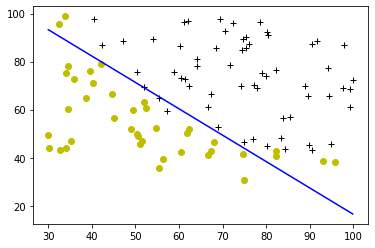

In [59]:
plot_decision_boundary(w, b, X_train, y_train)

In [65]:
def predict(X, w, b):
    m, n = X.shape
    f = compute_f(X, w, b)
    res = np.where(f >= 0.5, 1, 0)
    return np.reshape(res, -1)

In [66]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0 1 1 1]
All tests passed!


In [67]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


In [68]:
X_train, y_train = load_data("data/ex2data2.txt")

In [70]:
print(X_train[:5], y_train[:5])
print(X_train.shape)

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]] [1. 1. 1. 1. 1.]
(118, 2)


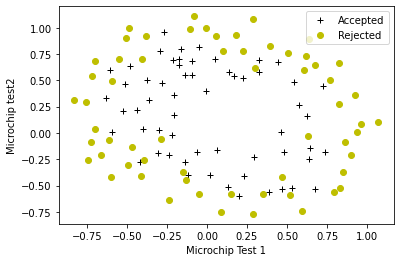

In [71]:
plot_data(X_train, y_train[:], pos_label='Accepted', neg_label="Rejected")
plt.ylabel('Microchip test2')
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()

In [72]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [73]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [74]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m, _ = X.shape
    cost_without_reg = compute_cost(X, y, w, b, lambda_)
    reg_cost = np.sum(w ** 2) * lambda_ / ( 2 * m)
    return cost_without_reg + reg_cost

In [75]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)


Regularized cost : 0.6618252552483951
All tests passed!


In [76]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    dj_dw = dj_dw + lambda_ * w / m
    return dj_db, dj_dw

In [77]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343654
First few elements of regularized dj_dw:
 [-0.010386028450548692, 0.01140985288328012, 0.0536273463274574, 0.0031402782673134637]
All tests passed!


In [79]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 100000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 10000: Cost     0.45   
Iteration 20000: Cost     0.40   
Iteration 30000: Cost     0.38   
Iteration 40000: Cost     0.37   
Iteration 50000: Cost     0.36   
Iteration 60000: Cost     0.36   
Iteration 70000: Cost     0.35   
Iteration 80000: Cost     0.35   
Iteration 90000: Cost     0.35   
Iteration 99999: Cost     0.35   


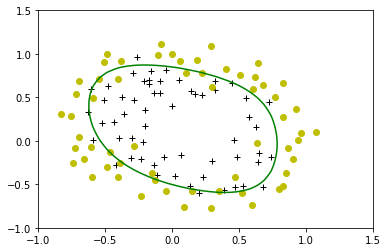

In [80]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [81]:
print(w)

[ 2.32853776  3.52917797 -5.17590036 -3.97937612 -5.13682145  0.84840439
 -1.74337299 -0.94970428 -0.35232477 -3.78954164  0.22793763 -1.86067475
 -1.68060496 -2.79630902 -0.82557204 -0.54371337  0.39920031 -1.17178331
 -1.70432183 -0.37905221 -2.75531703  0.79212594 -1.0628005   0.47752099
 -0.87903247 -0.68618147 -1.84366056]


In [82]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 83.898305


In [86]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 50000
alpha = 0.01

lambda_list = np.array([0.001, 0.01, 0.1, 1, 10])
for lambda_ in lambda_list:
    w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)
    p = predict(X_mapped, w, b)
    acc = np.mean(p == y_train) * 100
    print("with lambda = {}, accuracy = {}".format(lambda_, acc))

with lambda = 0.001, accuracy = 83.89830508474576
with lambda = 0.01, accuracy = 83.89830508474576
with lambda = 0.1, accuracy = 83.05084745762711
with lambda = 1.0, accuracy = 83.05084745762711
with lambda = 10.0, accuracy = 74.57627118644068
